In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def graph(value_list, value_str, Q_str):
    M_list = ['opt','rand']
    even_dict = {'X': -1, 'O': 1, None: 0, '-': 0}
    odd_dict  = {'X': 1, 'O': -1, None: 0, '-': 0}

    M_rand = []
    M_opt = []
    M = [M_rand, M_opt]
    for m in range(2):
        for j in value_list:
            file_name = Q_str + '_' + M_list[m] + '_' + value_str + str(j)
            file_path = Q_str + "/" + file_name + ".npy"
            
            print(file_path)

            rewards = np.load(file_path, allow_pickle = True)
            rewards[:,:,::2]  = np.vectorize(even_dict.__getitem__)(rewards[:,:,::2])
            rewards[:,:,1::2] = np.vectorize(odd_dict.__getitem__)(rewards[:,:,1::2])

            M[m].append(rewards.mean(axis=2).mean(axis=0))
    
    palette_opt = plt.get_cmap('YlOrRd')
    palette_rand = plt.get_cmap('Blues')

    for i in range(len(M_opt)):
        plt.plot(np.arange(80), M_opt[i], color=palette_opt(i*30 + 50),
                 label='$M_{opt}$ ' + value_str + f'= {value_list[i]}')

    for i in range(len(M_rand)):
        plt.plot(np.arange(80), M_rand[i], color=palette_rand(i*30 + 50),
                 label='$M_{rand}$ ' + value_str + f'= {value_list[i]}')

    plt.legend(loc=4, ncol=2)

    plt.title("MODIFICARE", loc='left', fontsize=12, fontweight=0)
    plt.xlabel("MODIFICARE")
    plt.rcParams["figure.figsize"] = (20,12)

    plt.show()


Q7/Q7_opt_e0.1.npy
Q7/Q7_opt_e0.25.npy
Q7/Q7_opt_e0.5.npy
Q7/Q7_opt_e0.75.npy
Q7/Q7_opt_e0.9.npy
Q7/Q7_rand_e0.1.npy
Q7/Q7_rand_e0.25.npy
Q7/Q7_rand_e0.5.npy
Q7/Q7_rand_e0.75.npy
Q7/Q7_rand_e0.9.npy


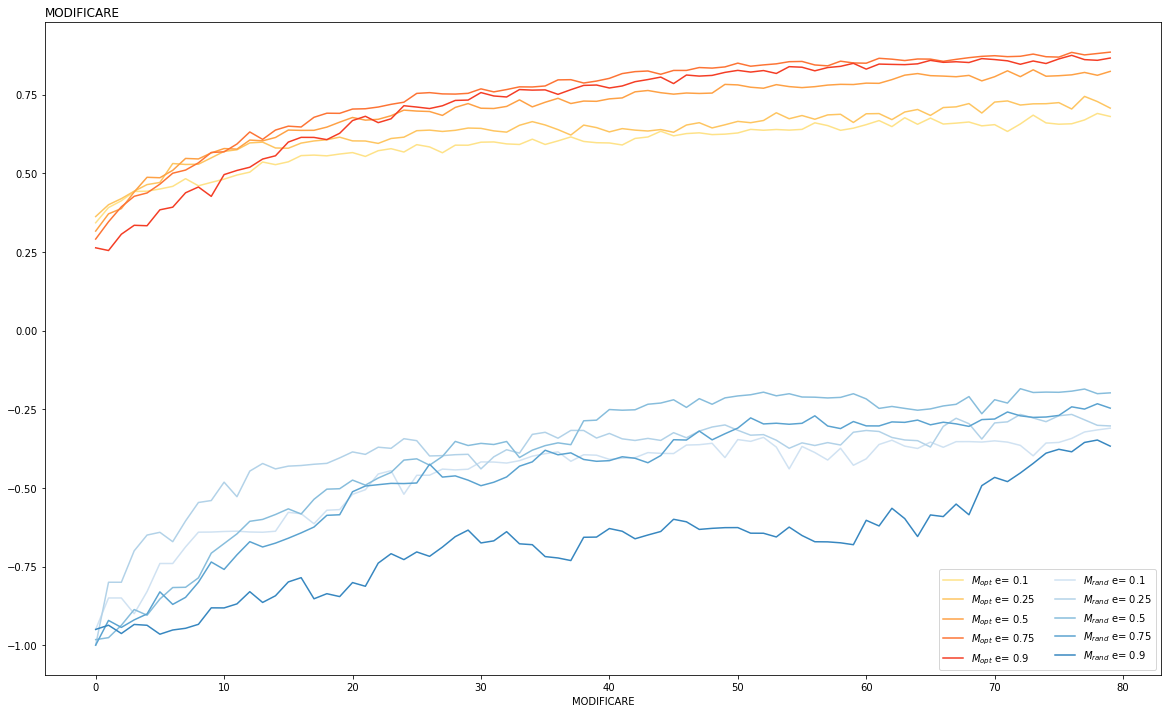

In [5]:
e_list = [0.1, 0.25, 0.5, 0.75, 0.9]
n_list = [1,1000,5000,10000,15000,20000,40000]

value_str = 'e'
Q_str = 'Q7'

graph(e_list, value_str, Q_str)

In [148]:
rewards = np.load(r"C:\Users\artur\OneDrive\Documenti\GitHub\ANN\ANN---project\project\Q7\Q7_opt_e0.npy", allow_pickle = True)

In [149]:
rewards.shape

(10, 80, 500)